In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2746 - val_loss: 0.1906
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1716 - val_loss: 0.1541
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1443 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1281 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1181 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1117 - val_loss: 0.1082
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1070 - val_loss: 0.1038
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1033 - val_loss: 0.1007
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1004 - val_loss: 0.0980
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0982 - val_loss: 0.0962

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

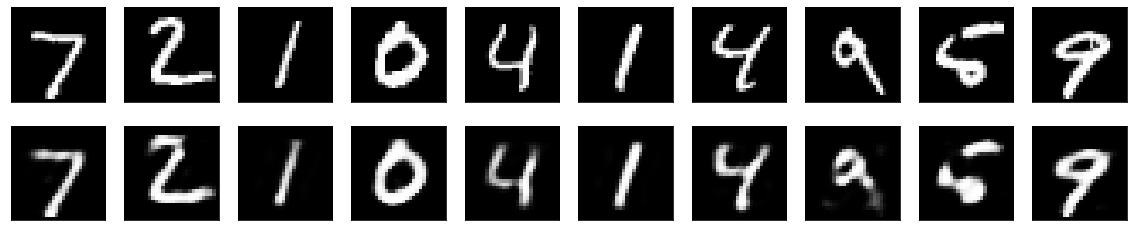

In [9]:

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding a sparsity constraint on the encoded representations


In [11]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [12]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2842 - val_loss: 0.1964
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1784 - val_loss: 0.1624
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1539 - val_loss: 0.1443
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1394 - val_loss: 0.1323
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1292 - val_loss: 0.1235
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1219 - val_loss: 0.1177
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1170 - val_loss: 0.1136
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1135 - val_loss: 0.1108
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1110 - val_loss: 0.1088
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1092 - va

Epoch 81/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0975 - val_loss: 0.0965
Epoch 82/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0975 - val_loss: 0.0965
Epoch 83/100
235/235 [==============================] - 4s 18ms/step - loss: 0.0975 - val_loss: 0.0964
Epoch 84/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0974 - val_loss: 0.0964
Epoch 85/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0974 - val_loss: 0.0965
Epoch 86/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0974 - val_loss: 0.0964
Epoch 87/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 88/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0973 - val_loss: 0.0962
Epoch 90/100
235/235 [==============================] - 3s 13ms/step - lo

# Convolutional autoencoder

In [14]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [16]:
#!tensorboard --logdir=/tmp/autoencoder

In [17]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 140s 298ms/step - loss: 0.2129 - val_loss: 0.1459
Epoch 2/50
469/469 [==============================] - 168s 358ms/step - loss: 0.1371 - val_loss: 0.1292
Epoch 3/50
469/469 [==============================] - 164s 349ms/step - loss: 0.1257 - val_loss: 0.1210
Epoch 4/50
469/469 [==============================] - 161s 344ms/step - loss: 0.1195 - val_loss: 0.1158
Epoch 5/50
469/469 [==============================] - 141s 301ms/step - loss: 0.1150 - val_loss: 0.1119
Epoch 6/50
469/469 [==============================] - 147s 313ms/step - loss: 0.1116 - val_loss: 0.1095
Epoch 7/50
469/469 [==============================] - 124s 265ms/step - loss: 0.1091 - val_loss: 0.1070
Epoch 8/50
469/469 [==============================] - 99s 210ms/step - loss: 0.1073 - val_loss: 0.1054
Epoch 9/50
469/469 [==============================] - 83s 178ms/step - loss: 0.1059 - val_loss: 0.1043
Epoch 10/50
469/469 [==============================] - 74s 157ms/s

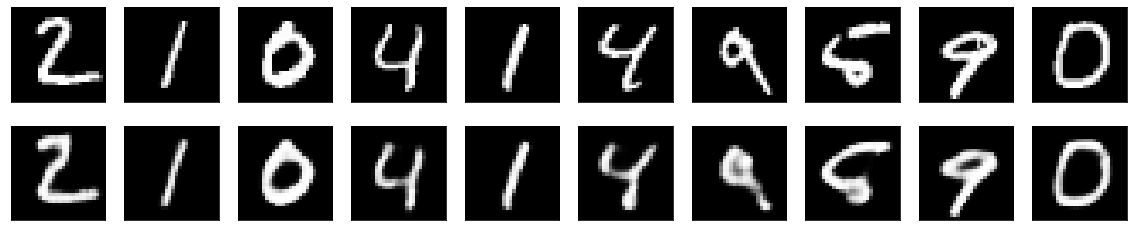

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

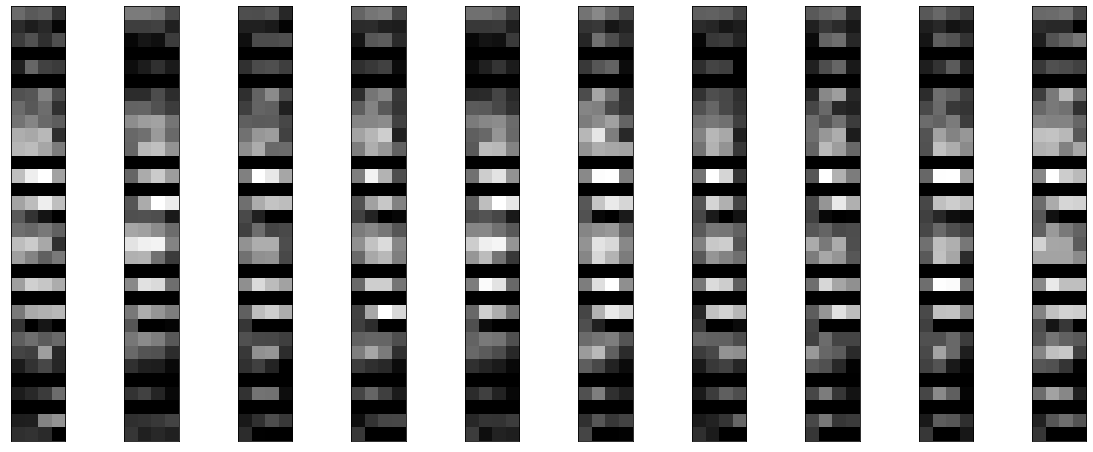

In [19]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

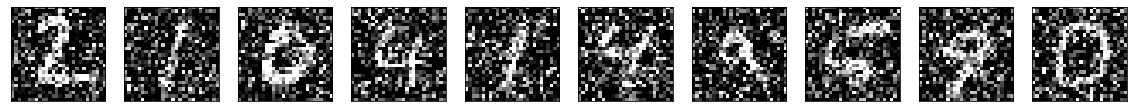

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 97s 206ms/step - loss: 0.1609 - val_loss: 0.1172
Epoch 2/100
469/469 [==============================] - 72s 154ms/step - loss: 0.1138 - val_loss: 0.1086
Epoch 3/100
469/469 [==============================] - 72s 153ms/step - loss: 0.1078 - val_loss: 0.1052
Epoch 4/100
469/469 [==============================] - 71s 152ms/step - loss: 0.1048 - val_loss: 0.1030
Epoch 5/100
469/469 [==============================] - 72s 153ms/step - loss: 0.1030 - val_loss: 0.1015
Epoch 6/100
469/469 [==============================] - 71s 152ms/step - loss: 0.1016 - val_loss: 0.1001
Epoch 7/100
469/469 [==============================] - 70s 150ms/step - loss: 0.1005 - val_loss: 0.0993
Epoch 8/100
469/469 [==============================] - 71s 151ms/step - loss: 0.0997 - val_loss: 0.0987
Epoch 9/100
469/469 [==============================] - 71s 150ms/step - loss: 0.0989 - val_loss: 0.0981
Epoch 10/100
469/469 [==============================] - 71s 152m

Epoch 79/100
469/469 [==============================] - 87s 186ms/step - loss: 0.0932 - val_loss: 0.0941
Epoch 80/100
469/469 [==============================] - 100s 212ms/step - loss: 0.0932 - val_loss: 0.0933
Epoch 81/100
469/469 [==============================] - 96s 205ms/step - loss: 0.0932 - val_loss: 0.0933
Epoch 82/100
469/469 [==============================] - 90s 191ms/step - loss: 0.0932 - val_loss: 0.0932
Epoch 83/100
469/469 [==============================] - 95s 202ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 84/100
469/469 [==============================] - 90s 193ms/step - loss: 0.0931 - val_loss: 0.0933
Epoch 85/100
469/469 [==============================] - 89s 191ms/step - loss: 0.0931 - val_loss: 0.0931
Epoch 86/100
469/469 [==============================] - 112s 240ms/step - loss: 0.0931 - val_loss: 0.0933
Epoch 87/100
469/469 [==============================] - 80s 171ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 88/100
469/469 [==============================]

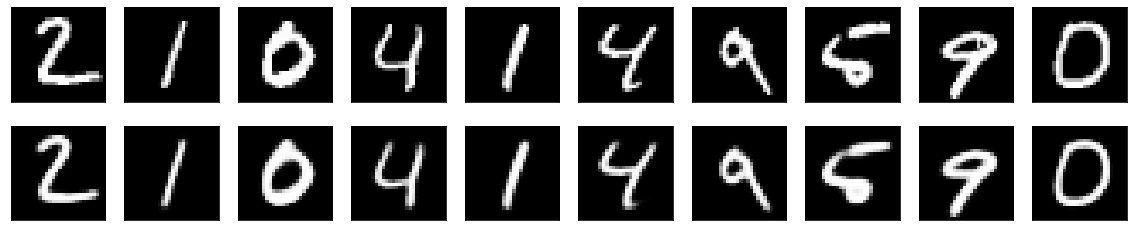

In [24]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()